In [3]:
import pandas as pd

df=pd.read_csv('dataset_types_toxic.csv')
print(df.head())

                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  


In [4]:
print(df.columns.values)

['id' 'comment_text' 'toxic' 'severe_toxic' 'obscene' 'threat' 'insult'
 'identity_hate']


In [5]:
euph=pd.read_csv('eupher.csv')
print(euph.head())

   Unnamed: 0                  keyword  \
0           0                   tinkle   
1           1                   tinkle   
2           2  undocumented immigrants   
3           3  undocumented immigrants   
4           4  undocumented immigrants   

                                         edited_text  is_euph  \
0  We're just getting back what was TAKEN from us...        1   
1  I think AB390 will pass next year now that the...        1   
2  Singled Out Think Like a Man, the new movie ba...        1   
3  Not to be outdone, Sen. Rand Paul (R-Ky. ), so...        1   
4  The law has also galvanized the growing immigr...        1   

               category                    type  euph_status  \
0  body functions/parts                  tinkle  always_euph   
1  body functions/parts                  tinkle  always_euph   
2              politics  undocumented immigrant  always_euph   
3              politics  undocumented immigrant  always_euph   
4              politics  undocumente

In [7]:
print(euph.columns.values)

['Unnamed: 0' 'keyword' 'edited_text' 'is_euph' 'category' 'type'
 'euph_status' 'sentence' 'is_vague']


Euphermism words with toxic or not toxic

In [9]:
import pandas as pd
import re

# Load the CSV file
df = pd.read_csv('toxicity_encode.csv')

# Define a function to find words with special characters
def extract_special_char_words(text):
    # Regular expression to match words with special characters
    # Adding @, #, !, and ? to the list of special characters to match
    special_char_words = re.findall(r'\b\w*[@#!?]\w*\b', text)
    return special_char_words

# Apply the function to each row and create a new DataFrame
special_char_words = []
toxicity_labels = []

for index, row in df.iterrows():
    words_with_special_chars = extract_special_char_words(row['text'])
    for word in words_with_special_chars:
        special_char_words.append(word)
        toxicity_labels.append(row['is_toxic'])

# Create a new DataFrame with the extracted words and their toxicity labels
result_df = pd.DataFrame({
    'word': special_char_words,
    'is_toxic': toxicity_labels
})

# Save the resulting DataFrame to a new CSV file
result_df.to_csv('euphe_words.csv', index=False)

print("The new CSV file has been created successfully.")


The new CSV file has been created successfully.


In [10]:
import pandas as pd
import re

# Load the CSV file
df = pd.read_csv('dataset_types_toxic.csv')

# Define a function to find words with special characters
def extract_special_char_words(text):
    # Regular expression to match words with special characters
    special_char_words = re.findall(r'\b\w*[@#!?]\w*\b', text)
    return special_char_words

# Initialize lists to store words and their corresponding toxicity labels
special_char_words = []
toxicity_labels = []

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    words_with_special_chars = extract_special_char_words(row['comment_text'])
    is_toxic = int(
        row['toxic'] == 1 or
        row['severe_toxic'] == 1 or
        row['obscene'] == 1 or
        row['threat'] == 1 or
        row['insult'] == 1 or
        row['identity_hate'] == 1
    )
    for word in words_with_special_chars:
        special_char_words.append(word)
        toxicity_labels.append(is_toxic)

# Create a new DataFrame with the extracted words and their toxicity labels
result_df = pd.DataFrame({
    'word': special_char_words,
    'is_toxic': toxicity_labels
})

# Append to the existing CSV file or create it if it does not exist
result_df.to_csv('euphe_words.csv', mode='a', index=False, header=not pd.io.common.file_exists('euphe_words.csv'))

print("The CSV file has been updated successfully.")


The CSV file has been updated successfully.


Data cleaning in eupher words

In [11]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('euphe_words.csv')

# Drop duplicate words based on the "word" column
cleaned_df = df.drop_duplicates(subset='word', keep='first')

# Save the cleaned DataFrame to a new CSV file
cleaned_df.to_csv('cleaned_euphe_words.csv', index=False)

print("Duplicates removed and the cleaned CSV file has been created.")


Duplicates removed and the cleaned CSV file has been created.


Number of words labeled as not toxic (0): 3515
Number of words labeled as toxic (1): 238


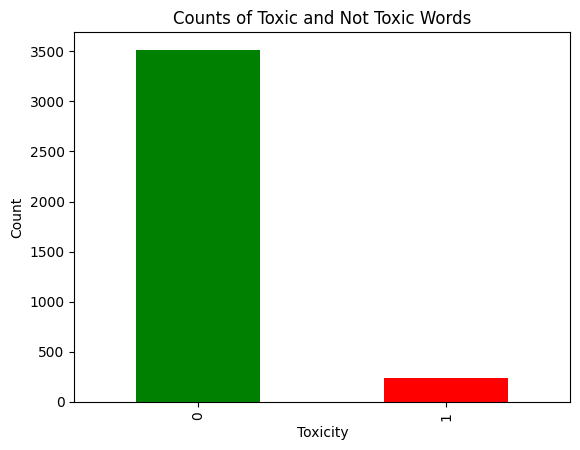

In [15]:
import pandas as pd

# Load the cleaned CSV file
df = pd.read_csv('cleaned_euphe_words.csv')

# Count the number of occurrences of each value in the "is_toxic" column
toxic_counts = df['is_toxic'].value_counts()

# Print the counts
print("Number of words labeled as not toxic (0):", toxic_counts[0])
print("Number of words labeled as toxic (1):", toxic_counts[1])

# Plotting the bar graph
toxic_counts.plot(kind='bar', color=['green', 'red'])

# Adding labels and title
plt.xlabel('Toxicity')
plt.ylabel('Count')
plt.title('Counts of Toxic and Not Toxic Words')

# Show the plot
plt.show()


cleaning dataset_types_toxic

In [17]:
import pandas as pd
import re

# Load the CSV file
df = pd.read_csv('dataset_types_toxic.csv')

# Remove quotes from the beginning and end of strings in all columns
df = df.applymap(lambda x: x.strip('"') if isinstance(x, str) else x)

# Remove spaces from the start of sentences in the "comment_text" column
df['comment_text'] = df['comment_text'].apply(lambda x: x.lstrip())

# Define a function to check for special characters between words
def has_special_character(text):
    return bool(re.search(r'\b\w*[@#!?]\w*\b', text))

# Add a column "is_eupher" based on special characters between words
df['is_eupher'] = df['comment_text'].apply(has_special_character).astype(int)

# Add a column "is_toxic" based on specified conditions
toxic_columns = ['severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
df['is_toxic'] = df[toxic_columns].max(axis=1)

# Print the modified DataFrame
print(df.head())

# Save the modified DataFrame to a new CSV file
df.to_csv('modified_dataset.csv', index=False)


C:\Users\DELL\AppData\Local\Temp\ipykernel_11600\2564056982.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip('"') if isinstance(x, str) else x)


                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  More\nI can't make any real suggestions on imp...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  is_eupher  is_toxic  
0             0        0       0       0              0          0         0  
1             0        0       0       0              0          0         0  
2             0        0       0       0              0          0         0  
3             0        0       0       0              0          1         0  
4             0        0       0       0              0          0         0  


Number of rows labeled as toxic (is_toxic = 1): 10559
Number of rows labeled as not toxic (is_toxic = 0): 149012


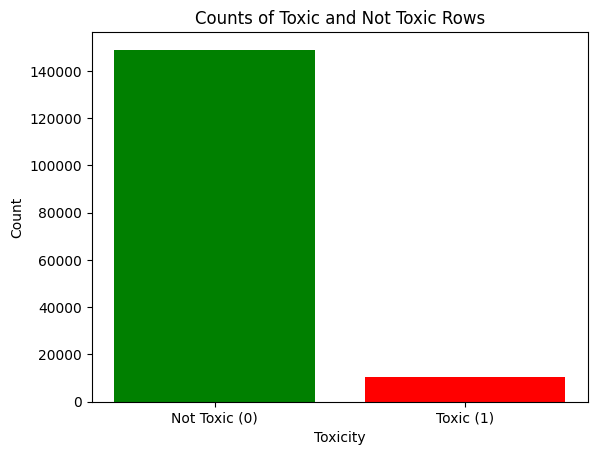

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the modified CSV file
df = pd.read_csv('modified_dataset.csv')

# Count the number of occurrences of each value in the "is_toxic" column
toxic_counts = df['is_toxic'].value_counts()

# Get the counts, defaulting to 0 if not present
num_toxic = toxic_counts.get(1, 0)
num_not_toxic = toxic_counts.get(0, 0)

# Print the counts
print("Number of rows labeled as toxic (is_toxic = 1):", num_toxic)
print("Number of rows labeled as not toxic (is_toxic = 0):", num_not_toxic)

# Plotting the bar graph
labels = ['Not Toxic (0)', 'Toxic (1)']
counts = [num_not_toxic, num_toxic]

plt.bar(labels, counts, color=['green', 'red'])
plt.xlabel('Toxicity')
plt.ylabel('Count')
plt.title('Counts of Toxic and Not Toxic Rows')

# Show the plot
plt.show()
